In [1]:
# load the pandas library
import pandas as pd
import numpy as np
# importing dataset from github. 
# This data set contains information information pertaining to NY State High School graduation metrics for the 2018-2019 school year
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/Project1_Data.csv"
df = pd.read_csv(filename)
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [2]:
df #sanity check

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


some numerical columns has value "-" need to remove those rows since enroll_cnt is "-" which can be infered as no student enrollement was done

In [3]:
df= df[df["enroll_cnt"].str.contains("-")==False] #removed rows containing "-". Rows reduced from 73152 to 39674

In [4]:
df.shape # 39674 rows and 29 columns (45% rows are removed)

(39674, 29)

In [5]:
# checking datatype and null values of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39674 entries, 0 to 73146
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          39674 non-null  object
 1   aggregation_index           39674 non-null  int64 
 2   aggregation_type            39674 non-null  object
 3   aggregation_name            39674 non-null  object
 4   nrc_code                    39674 non-null  int64 
 5   nrc_desc                    39674 non-null  object
 6   county_code                 39674 non-null  int64 
 7   county_name                 39674 non-null  object
 8   nyc_ind                     39674 non-null  int64 
 9   membership_desc             39674 non-null  object
 10  subgroup_code               39674 non-null  int64 
 11  subgroup_name               39674 non-null  object
 12  enroll_cnt                  39674 non-null  object
 13  grad_cnt                    39674 non-null  ob

In [6]:
# check for missing values
df.isnull().sum()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

There are no null values in the dataset 

In [7]:
# Check the statistical information for the dataset
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,39674.0,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.456269,36.774613,0.085245,8.833795
std,0.0,1.367020,20.063556,0.279249,5.768892
min,3.0,1.000000,1.000000,0.000000,1.000000
25%,3.0,4.000000,21.000000,0.000000,3.000000
50%,3.0,5.000000,35.000000,0.000000,9.000000
75%,3.0,5.000000,58.000000,0.000000,15.000000
max,3.0,6.000000,68.000000,1.000000,25.000000


we can see that some of the columns which are numerical are having object datatype. Need to convert them to integer

In [8]:
df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

In [9]:
#Convert Multiple Columns to Integer
df[['enroll_cnt', 'grad_cnt','local_cnt','reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt','still_enr_cnt' , 'ged_cnt', 'dropout_cnt']]= df[['enroll_cnt', 'grad_cnt','local_cnt','reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt','still_enr_cnt' , 'ged_cnt', 'dropout_cnt']].astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
df.info() #sanity check 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39674 entries, 0 to 73146
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          39674 non-null  object
 1   aggregation_index           39674 non-null  int64 
 2   aggregation_type            39674 non-null  object
 3   aggregation_name            39674 non-null  object
 4   nrc_code                    39674 non-null  int64 
 5   nrc_desc                    39674 non-null  object
 6   county_code                 39674 non-null  int64 
 7   county_name                 39674 non-null  object
 8   nyc_ind                     39674 non-null  int64 
 9   membership_desc             39674 non-null  object
 10  subgroup_code               39674 non-null  int64 
 11  subgroup_name               39674 non-null  object
 12  enroll_cnt                  39674 non-null  int64 
 13  grad_cnt                    39674 non-null  in

converted required columns to integer

In [11]:
df = df.reset_index()
df #sanity check

,index,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,23,6%,10,3%,18,5%,0,0%,91,25%
4,5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,...,5,5%,4,4%,8,8%,0,0%,28,29%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39669,73138,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,3,8%,1,3%,1,3%,0,0%,9,25%
39670,73142,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,8,17%,0,0%,0,0%,0,0%,5,10%
39671,73143,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,0,0%,3,23%,2,15%,0,0%,6,46%
39672,73145,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,...,3,9%,3,9%,0,0%,0,0%,7,21%


In [12]:
#removing the index column as it is not needed
del df["index"]

In [13]:
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
count,39674.0,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,3.0,4.456269,36.774613,0.085245,8.833795,192.120079,161.178354,12.340903,86.804708,62.032742,1.924485,11.299516,1.377577,16.239225
std,0.0,1.367020,20.063556,0.279249,5.768892,439.972474,361.294773,32.046302,225.795826,132.777866,6.498913,40.766672,4.949389,50.129834
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,21.000000,0.000000,3.000000,25.000000,20.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,1.000000
50%,3.0,5.000000,35.000000,0.000000,9.000000,66.000000,57.000000,4.000000,27.000000,18.000000,0.000000,2.000000,0.000000,3.000000
75%,3.0,5.000000,58.000000,0.000000,15.000000,179.000000,156.000000,10.000000,69.000000,62.000000,2.000000,5.000000,1.000000,9.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,557.000000,4752.000000,2231.000000,279.000000,1381.000000,97.000000,1091.000000


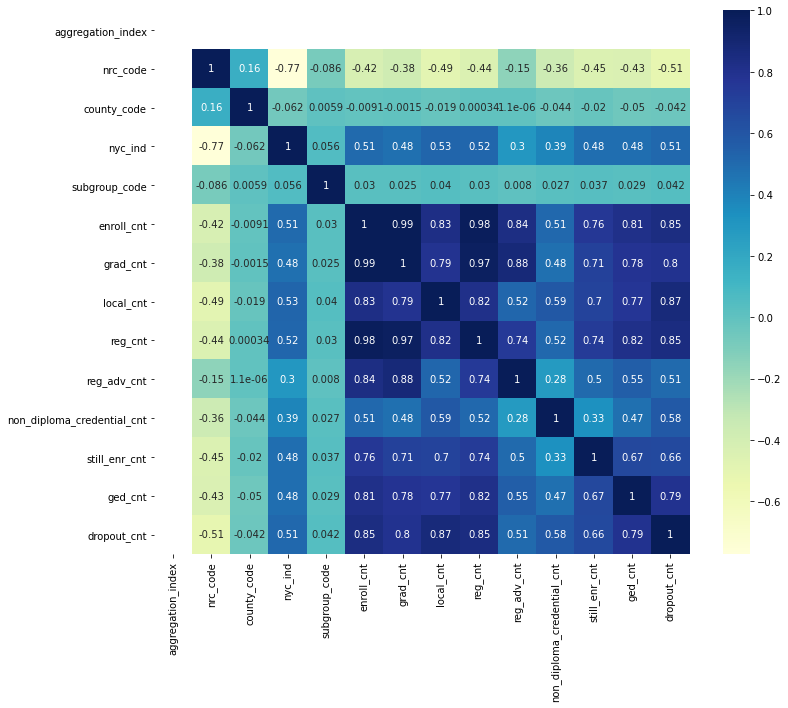

In [14]:
# importing seaborn and matplotlib pyplot libraries 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the features.

enroll_cnt, local_cnt, reg_cnt, grad_cnt, geb_cnt are highly correlated to dropout_cnt which is response variable compared to other variables

In [15]:
df["dropout_cnt"] #response variable

0        148
1         65
2         83
3         91
4         28
        ... 
39669      9
39670      5
39671      6
39672      7
39673      4
Name: dropout_cnt, Length: 39674, dtype: int64

In [16]:
df["subgroup_code"].unique() #subgroup_code 19 is missing 

array([ 1,  2,  3,  5,  6,  7,  8, 10, 11, 12, 13, 15, 16, 20, 21, 14,  9,
        4, 17, 18, 22, 23, 24, 25])

In [17]:
df["report_school_year"].unique() # data is only for the year 2018-19 

array(['2018-19'], dtype=object)

Categorical variables 

In [18]:
df["subgroup_name"].unique() #Text description of student subgrouping

array(['All Students', 'Female', 'Male', 'Black', 'Hispanic',
       'Asian/Pacific Islander', 'White', 'General Education Students',
       'Students with Disabilities', 'Not English Language Learner',
       'English Language Learner', 'Economically Disadvantaged',
       'Not Economically Disadvantaged', 'Homeless', 'Not Homeless',
       'Formerly English Language Learner', 'Multiracial',
       'American Indian/Alaska Native', 'Migrant', 'Not Migrant',
       'In Foster Care', 'Not in Foster Care', 'Parent in Armed Forces',
       'Parent Not in Armed Forces'], dtype=object)

In [19]:
len(pd.unique(df["subgroup_name"])) #count of student subgrouping

24

<AxesSubplot:xlabel='count', ylabel='subgroup_name'>

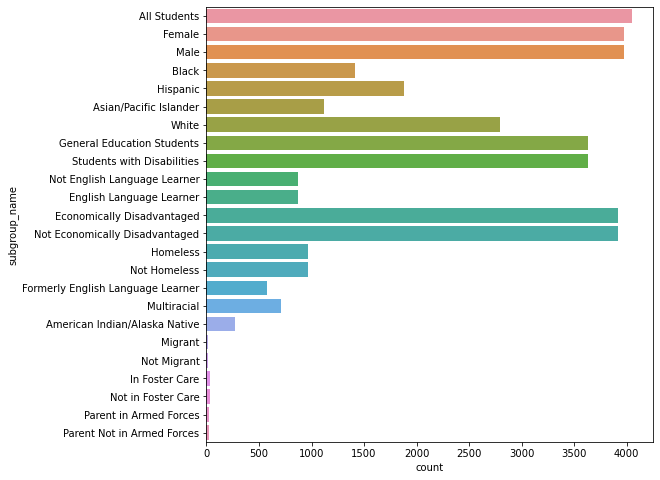

In [20]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, y='subgroup_name',ax=ax)

In [21]:
# pandas count distinct values in column
subgroup_namedf = df['subgroup_name'].value_counts()
subgroup_namedf

All Students                         4046
Male                                 3970
Female                               3970
Economically Disadvantaged           3918
Not Economically Disadvantaged       3918
Students with Disabilities           3632
General Education Students           3632
White                                2790
Hispanic                             1878
Black                                1416
Asian/Pacific Islander               1122
Homeless                              962
Not Homeless                          962
English Language Learner              872
Not English Language Learner          872
Multiracial                           708
Formerly English Language Learner     572
American Indian/Alaska Native         270
Not in Foster Care                     36
In Foster Care                         36
Parent in Armed Forces                 28
Parent Not in Armed Forces             28
Migrant                                18
Not Migrant                       

In [22]:
df["nrc_desc"].unique() #Text description of the type of school district

array(['Urban-Suburban High Needs', 'Average Needs', 'Low Needs',
       'Rural High Needs', 'Buffalo  Rochester  Yonkers  Syracuse', 'NYC'],
      dtype=object)

In [23]:
len(pd.unique(df["nrc_desc"])) #count of  the type of school district

6

In [24]:
# pandas count distinct values in column
nrc_descdf = df['nrc_desc'].value_counts()
nrc_descdf

Average Needs                            18260
Low Needs                                 7136
Rural High Needs                          7048
Urban-Suburban High Needs                 3412
NYC                                       3382
Buffalo  Rochester  Yonkers  Syracuse      436
Name: nrc_desc, dtype: int64

<AxesSubplot:xlabel='count', ylabel='nrc_desc'>

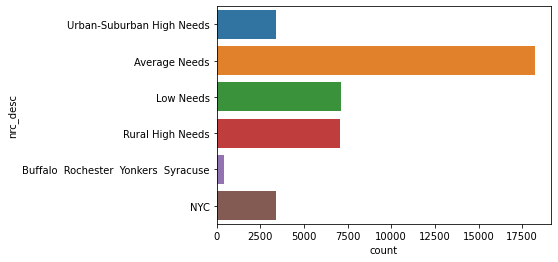

In [25]:
sns.countplot(data=df, y='nrc_desc')

data has the highest number of 'average needs' type of school district

In [26]:
df["county_name"].unique() #Full name of applicable NY State county

array(['ALBANY', 'ALLEGANY', 'BROOME', 'CATTARAUGUS', 'CAYUGA',
       'CHAUTAUQUA', 'CHEMUNG', 'CHENANGO', 'CLINTON', 'COLUMBIA',
       'CORTLAND', 'DELAWARE', 'DUTCHESS', 'ERIE', 'ESSEX', 'FRANKLIN',
       'FULTON', 'GENESEE', 'GREENE', 'HAMILTON', 'HERKIMER', 'JEFFERSON',
       'LEWIS', 'LIVINGSTON', 'MADISON', 'MONROE', 'MONTGOMERY', 'NASSAU',
       'NEW YORK', 'BRONX', 'KINGS', 'QUEENS', 'RICHMOND', 'NIAGARA',
       'ONEIDA', 'ONONDAGA', 'ONTARIO', 'ORANGE', 'ORLEANS', 'OSWEGO',
       'OTSEGO', 'PUTNAM', 'RENSSELAER', 'ROCKLAND', 'SAINT LAWRENCE',
       'SARATOGA', 'SCHENECTADY', 'SCHOHARIE', 'SCHUYLER', 'SENECA',
       'STEUBEN', 'SUFFOLK', 'SULLIVAN', 'TIOGA', 'TOMPKINS', 'ULSTER',
       'WARREN', 'WASHINGTON', 'WAYNE', 'WESTCHESTER', 'WYOMING', 'YATES'],
      dtype=object)

In [27]:
len(pd.unique(df["county_name"])) #count of applicable NY State county

62

In [28]:
# pandas count distinct values in column
county_namedf = df['county_name'].value_counts()
county_namedf

SUFFOLK        3996
NASSAU         3152
WESTCHESTER    2700
ERIE           1770
MONROE         1356
               ... 
CHEMUNG         174
RICHMOND        108
YATES           100
SCHUYLER         94
HAMILTON         38
Name: county_name, Length: 62, dtype: int64

we can observe that suffolk county has highest number of enrollments whereas Hamilton county has lowest from the dataset

In [29]:
df["aggregation_name"].unique() #list of unique school names 

array(['ALBANY CITY SCHOOL DISTRICT',
       'BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT',
       'BETHLEHEM CENTRAL SCHOOL DISTRICT',
       'RAVENA-COEYMANS-SELKIRK CENTRAL SCHOOL DISTRICT',
       'COHOES CITY SCHOOL DISTRICT',
       'SOUTH COLONIE CENTRAL SCHOOL DISTRICT', 'NORTH COLONIE CSD',
       'GREEN ISLAND UNION FREE SCHOOL DISTRICT',
       'GUILDERLAND CENTRAL SCHOOL DISTRICT',
       'VOORHEESVILLE CENTRAL SCHOOL DISTRICT',
       'WATERVLIET CITY SCHOOL DISTRICT',
       'ALFRED-ALMOND CENTRAL SCHOOL DISTRICT',
       'ANDOVER CENTRAL SCHOOL DISTRICT',
       'GENESEE VALLEY CENTRAL SCHOOL DISTRICT',
       'BELFAST CENTRAL SCHOOL DISTRICT',
       'CANASERAGA CENTRAL SCHOOL DISTRICT',
       'FRIENDSHIP CENTRAL SCHOOL DISTRICT',
       'FILLMORE CENTRAL SCHOOL DISTRICT',
       'WHITESVILLE CENTRAL SCHOOL DISTRICT',
       'CUBA-RUSHFORD CENTRAL SCHOOL DISTRICT',
       'SCIO CENTRAL SCHOOL DISTRICT',
       'WELLSVILLE CENTRAL SCHOOL DISTRICT',
       'BOLIVAR-RICHB

In [30]:
len(pd.unique(df["aggregation_name"])) #count of unique school names 

677

In [31]:
# pandas count distinct values in column
aggregation_namedf = df['aggregation_name'].value_counts()
aggregation_namedf

SYRACUSE CITY SCHOOL DISTRICT                         116
NEW YORK CITY GEOGRAPHIC DISTRICT #26                 108
NEW YORK CITY GEOGRAPHIC DISTRICT # 7                 108
NEW YORK CITY GEOGRAPHIC DISTRICT # 9                 108
NEW YORK CITY GEOGRAPHIC DISTRICT # 8                 108
                                                     ... 
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT          4
FISHERS ISLAND UNION FREE SCHOOL DISTRICT               4
BERKSHIRE UNION FREE SCHOOL DISTRICT                    2
LONG LAKE CENTRAL SCHOOL DISTRICT                       2
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT      2
Name: aggregation_name, Length: 677, dtype: int64

SYRACUSE CITY SCHOOL DISTRICT has highest number whereas LONG LAKE CENTRAL SCHOOL DISTRICT has lowest number  

In [32]:
# Selecting numeric variables and creating a new dataframe 
numericdf = df[['enroll_cnt', 'grad_cnt','local_cnt','reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt','still_enr_cnt' , 'ged_cnt']].copy()

In [33]:
dropout_cnt = df[['dropout_cnt']].copy() #response variable

In [34]:
numericdf #sanity check

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
0,658,464,63,310,91,16,30,0
1,324,246,30,169,47,2,11,0
2,334,218,33,141,44,14,19,0
3,367,248,42,183,23,10,18,0
4,98,58,13,40,5,4,8,0
...,...,...,...,...,...,...,...,...
39669,36,25,2,20,3,1,1,0
39670,48,43,3,32,8,0,0,0
39671,13,2,0,2,0,3,2,0
39672,33,23,0,20,3,3,0,0


In [35]:
dropout_cnt #sanity check

,dropout_cnt
0,148
1,65
2,83
3,91
4,28
...,...
39669,9
39670,5
39671,6
39672,7


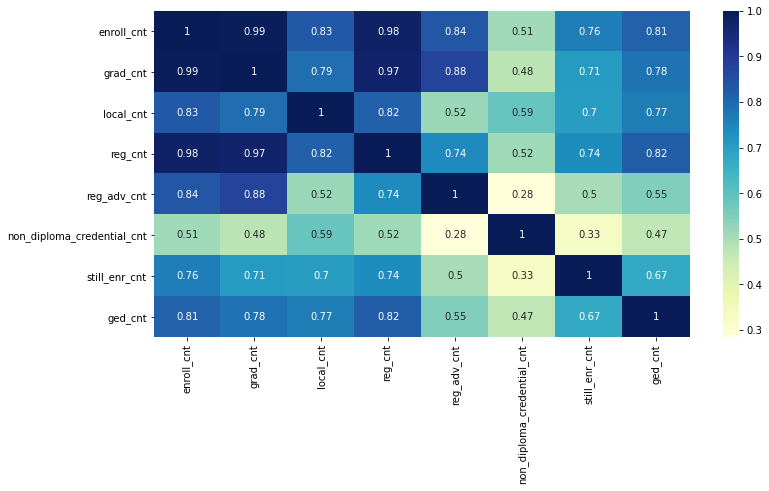

In [36]:
# importing seaborn and matplotlib pyplot libraries 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
corr = numericdf.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the features.

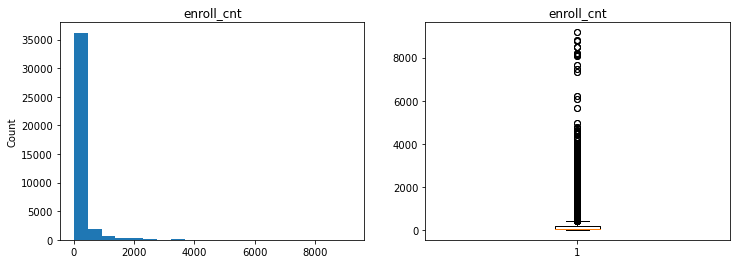

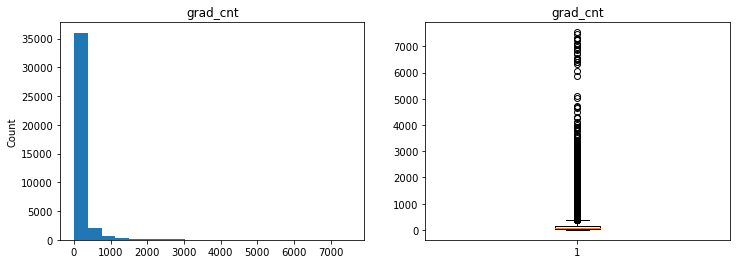

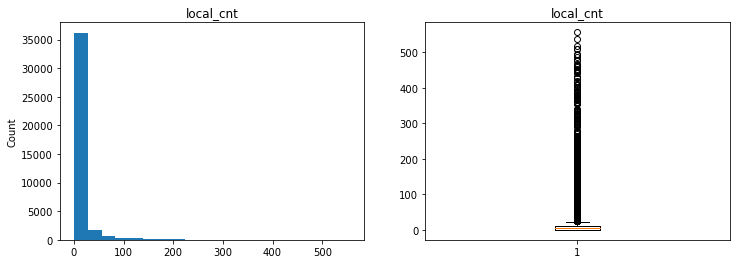

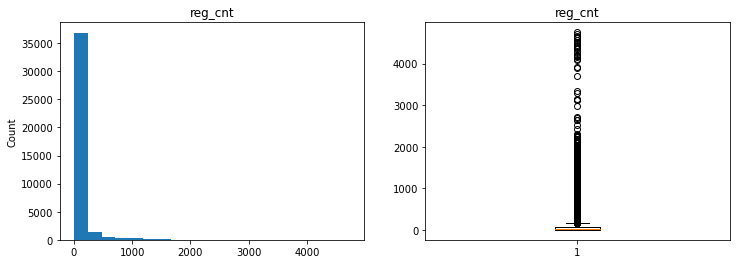

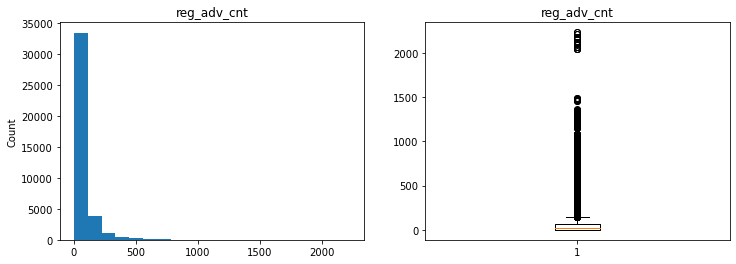

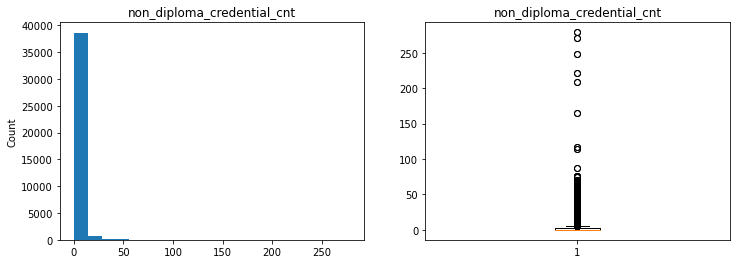

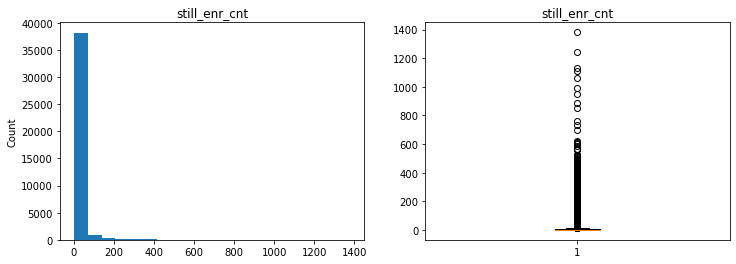

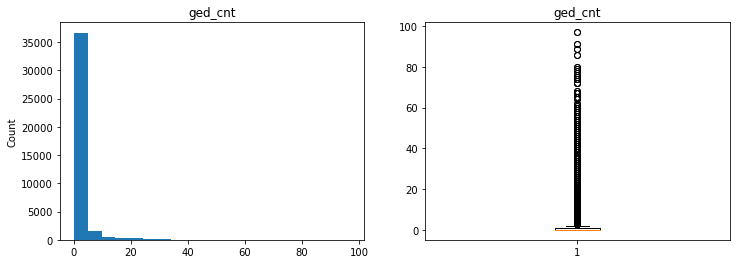

In [37]:
# for each column, create a histogram and boxplot side by side
# for numeric columns 
for i in range(0,8):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=numericdf.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(numericdf.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(numericdf.columns[i])
    plt.show()

We can observe that the attributes or dimensions are right skewed and need to be normalized for further work

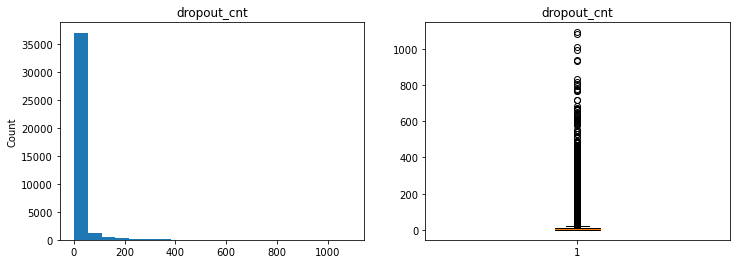

In [38]:
# for each column, create a histogram and boxplot side by side
# for Dropout_cnt column which is response variable 
for i in range(0,1):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=dropout_cnt.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(dropout_cnt.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(dropout_cnt.columns[i])
    plt.show()

It is right skewed and need to be normalized

##### Normalization of data

In [39]:
# columns to list 
numericsc = list(numericdf.columns)

In [40]:
numericsc #sanity check 

['enroll_cnt',
 'grad_cnt',
 'local_cnt',
 'reg_cnt',
 'reg_adv_cnt',
 'non_diploma_credential_cnt',
 'still_enr_cnt',
 'ged_cnt']

In [41]:
dropout_cntsc = list(dropout_cnt.columns)

In [42]:
dropout_cntsc #sanity check

['dropout_cnt']

In [43]:
#dataframe of numeric as well as response variables
alldf = df[['enroll_cnt', 'grad_cnt','local_cnt','reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt','still_enr_cnt' , 'ged_cnt', 'dropout_cnt']].copy()

In [44]:
# columns to list 
allsc = list(alldf.columns)

In [45]:
allsc #sanity check

['enroll_cnt',
 'grad_cnt',
 'local_cnt',
 'reg_cnt',
 'reg_adv_cnt',
 'non_diploma_credential_cnt',
 'still_enr_cnt',
 'ged_cnt',
 'dropout_cnt']

In [46]:
# importing power_transform for normalization of numerical values 
from sklearn.preprocessing import power_transform
standardized_data = pd.DataFrame(power_transform(df[numericsc]), columns = numericsc)
standardized_data

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
0,1.556674,1.439241,1.795464,1.619218,0.961980,1.836021,1.554668,-0.588644
1,1.117188,1.017930,1.405988,1.239676,0.573121,1.030762,1.139663,-0.588644
2,1.136630,0.936731,1.459189,1.123600,0.534733,1.812644,1.383663,-0.588644
3,1.196556,1.023360,1.589608,1.290279,0.162589,1.740634,1.361486,-0.588644
4,0.309499,0.028792,0.899879,0.283271,-0.646965,1.419519,0.977049,-0.588644
...,...,...,...,...,...,...,...,...
39669,-0.430522,-0.560272,-0.377276,-0.198965,-0.880875,0.548158,-0.287742,-0.588644
39670,-0.212331,-0.180122,-0.104297,0.129165,-0.411761,-0.886937,-1.205229,-0.588644
39671,-1.231135,-2.197090,-1.596883,-1.730139,-1.670955,1.273374,0.136176,-0.588644
39672,-0.497330,-0.618733,-1.596883,-0.198965,-0.880875,1.273374,-1.205229,-0.588644


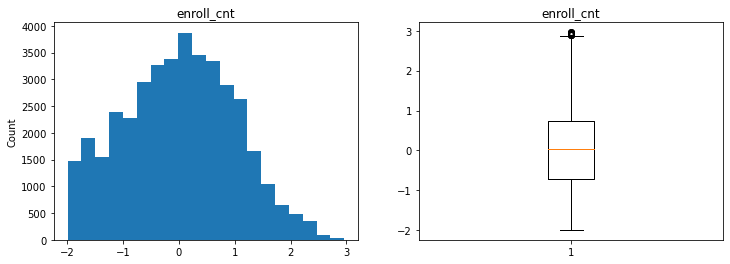

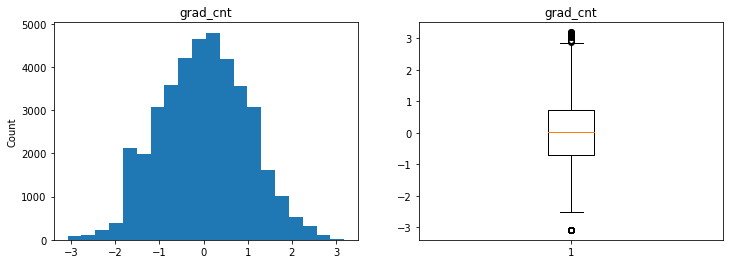

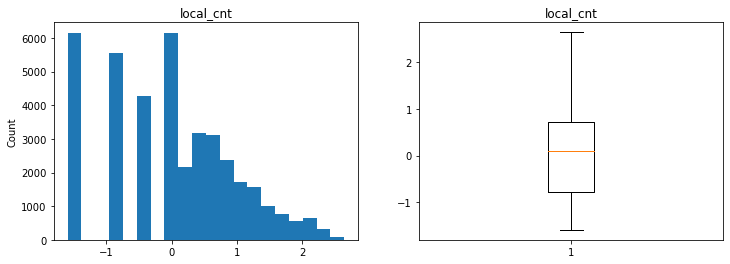

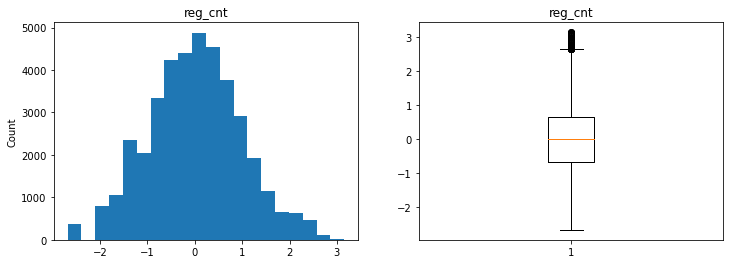

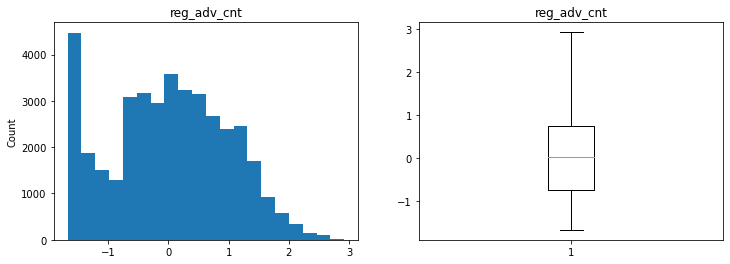

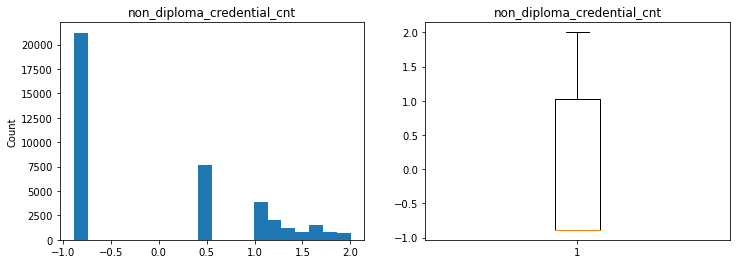

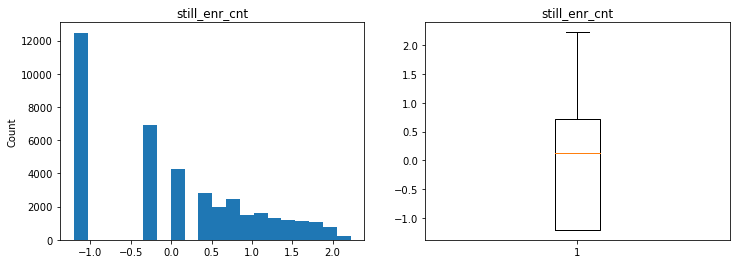

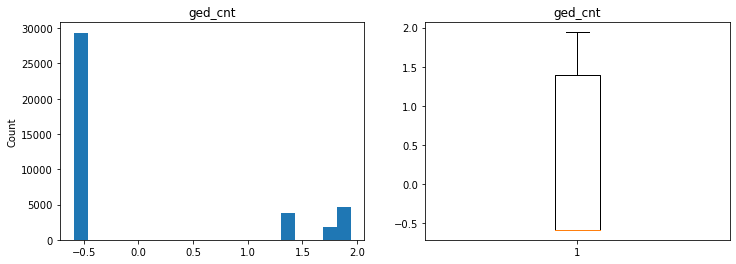

In [47]:
# plotting histogram and boxplot side by side
#plotting the normalized numeric variables
for i in range(0,8):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=standardized_data.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(standardized_data.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(standardized_data.columns[i])
    plt.show()

Now the dimensions are normalized which can be seen in the plots above

In [48]:
#normalization of response variable
standardized_datarv = pd.DataFrame(power_transform(df[dropout_cntsc]), columns = dropout_cntsc)
standardized_datarv

,dropout_cnt
0,1.952577
1,1.676750
2,1.765441
3,1.797294
4,1.322237
...,...
39669,0.715176
39670,0.349002
39671,0.465362
39672,0.561974


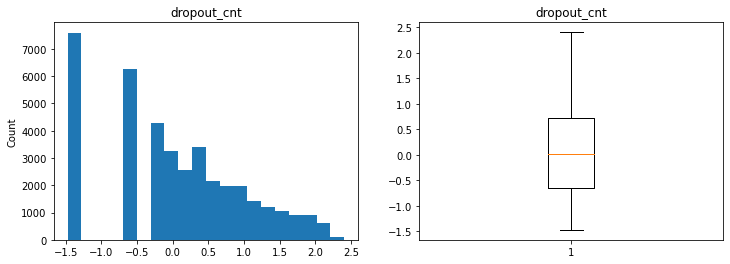

In [49]:
# plotting histogram and boxplot side by side
#plotting the normalized response variable
for i in range(0,1):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=standardized_datarv.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(standardized_datarv.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(standardized_datarv.columns[i])
    plt.show()

### Feature Selection / Dimensionality Reduction 

In [50]:
# importing required libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

[0.63585329 0.13247119 0.08653605 0.07145618 0.04304568 0.02446482
 0.00498751 0.00118528]


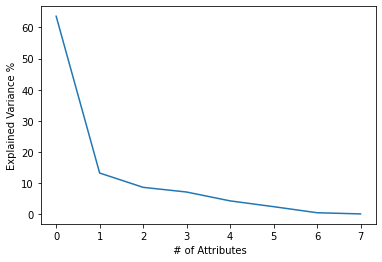

In [51]:
df0 = standardized_data[numericsc]
df1 =standardized_datarv[dropout_cntsc]

# assigning the explanatory and response variables 
X = df0
y = df1

# splitting the data into training + testing subsets 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model
pca = PCA()

# apply the PCA function to the training data
pca.fit(X_train)

# display and plot the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance %')
plt.xlabel(' # of Attributes')
plt.plot(100*pca.explained_variance_ratio_)
plt.show()

In [52]:
# calculating how many attributes required to explain 95% of total variance 
attributes = 0
threshold = 0.95 #variance
for i in range(len(pca.explained_variance_ratio_)):
    attributes += pca.explained_variance_ratio_[i]
    if attributes > threshold:
        print(str(i) + ' attributes required to explain 95% of total variance.')
        break

4 attributes required to explain 95% of total variance.


#### we are not using only 4 attributes but total of 8 attributes from numerics dataframe for modeling 

### Regression Model Construction & Evaluation

##### 1. Linear regression models

In [53]:
X = standardized_data
X

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
0,1.556674,1.439241,1.795464,1.619218,0.961980,1.836021,1.554668,-0.588644
1,1.117188,1.017930,1.405988,1.239676,0.573121,1.030762,1.139663,-0.588644
2,1.136630,0.936731,1.459189,1.123600,0.534733,1.812644,1.383663,-0.588644
3,1.196556,1.023360,1.589608,1.290279,0.162589,1.740634,1.361486,-0.588644
4,0.309499,0.028792,0.899879,0.283271,-0.646965,1.419519,0.977049,-0.588644
...,...,...,...,...,...,...,...,...
39669,-0.430522,-0.560272,-0.377276,-0.198965,-0.880875,0.548158,-0.287742,-0.588644
39670,-0.212331,-0.180122,-0.104297,0.129165,-0.411761,-0.886937,-1.205229,-0.588644
39671,-1.231135,-2.197090,-1.596883,-1.730139,-1.670955,1.273374,0.136176,-0.588644
39672,-0.497330,-0.618733,-1.596883,-0.198965,-0.880875,1.273374,-1.205229,-0.588644


In [54]:
y = standardized_datarv
y

,dropout_cnt
0,1.952577
1,1.676750
2,1.765441
3,1.797294
4,1.322237
...,...
39669,0.715176
39670,0.349002
39671,0.465362
39672,0.561974


In [55]:
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; 
# Rnadom state is kept to 12 to have the ability to reproduce the exact same training and testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [56]:
len(X_train) #70% observations for training

27771

In [57]:
len(X_test) #30% observations for testing 

11903

In [58]:
# checking the indices of the new objects
y_test.head()

,dropout_cnt
27565,0.349002
28080,0.016472
1616,-0.244745
25809,0.204380
7440,0.016472


In [59]:
# checking the indices of the new objects
X_test.head()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
27565,0.523772,0.531240,0.095702,0.316788,0.839498,1.419519,0.576053,-0.588644
28080,0.181905,0.225604,-0.104297,-0.100994,0.620778,0.548158,-0.287742,-0.588644
1616,-1.619843,-1.798520,-0.793012,-1.491079,-1.670955,0.548158,-0.287742,-0.588644
25809,-0.331359,-0.344610,-0.377276,-0.042684,-0.480219,-0.886937,0.395586,-0.588644
7440,-0.430522,-0.456166,0.899879,-0.501851,-0.880875,0.548158,0.395586,-0.588644


In [60]:
X_train.head()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt
9304,-0.181720,-0.117928,-0.793012,-0.198965,0.232076,-0.886937,0.395586,-0.588644
6022,1.542812,1.597574,1.169226,1.391992,1.783571,1.419519,0.977049,-0.588644
17255,1.762418,1.682077,2.023242,1.951746,0.350720,1.881906,1.648242,1.914182
23819,-1.726201,-1.438117,-1.596883,-1.308779,-0.880875,-0.886937,-1.205229,-0.588644
25727,-0.010131,-0.060884,0.847962,0.210669,-0.880875,1.419519,0.711312,-0.588644


In [61]:
y_train.head()

,dropout_cnt
9304,-1.473244
6022,1.482036
17255,2.024350
23819,-1.473244
25727,0.016472


In [62]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

1st multiple linear regression model

In [63]:
# create a new dataframe containing only selected explanatory variables
newX_train = X_train[['enroll_cnt','local_cnt','reg_cnt','grad_cnt']].copy()

# sanity check
newX_train.head()

,enroll_cnt,local_cnt,reg_cnt,grad_cnt
9304,-0.181720,-0.793012,-0.198965,-0.117928
6022,1.542812,1.169226,1.391992,1.597574
17255,1.762418,2.023242,1.951746,1.682077
23819,-1.726201,-1.596883,-1.308779,-1.438117
25727,-0.010131,0.847962,0.210669,-0.060884


In [64]:
model = LinearRegression() #parameter for cross validation model

# fit the model using 5-fold cross validation 

scores = cross_val_score(model, newX_train, y_train, cv=5)

# printing the R^2 metrics derived from the K-fold cross validation of this linear regression model
print (scores)

[0.67809464 0.65888331 0.65511703 0.65656209 0.66058692]


In [65]:
# calculating the average R^2 across all 5 folds
np.mean(scores)

0.6618487979328193

1st model has 66.2% accuracy

 2nd model 

In [66]:
newX_train1 = X_train[['local_cnt', 'reg_cnt', 'grad_cnt', 'ged_cnt']].copy()

# sanity check
newX_train1.head()

,local_cnt,reg_cnt,grad_cnt,ged_cnt
9304,-0.793012,-0.198965,-0.117928,-0.588644
6022,1.169226,1.391992,1.597574,-0.588644
17255,2.023242,1.951746,1.682077,1.914182
23819,-1.596883,-1.308779,-1.438117,-0.588644
25727,0.847962,0.210669,-0.060884,-0.588644


In [67]:
model1 = LinearRegression()

scores1 = cross_val_score(model1, newX_train1, y_train, cv=5)

# printing the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores1)

[0.57015696 0.57572871 0.56880234 0.56003222 0.57403506]


In [68]:
# calculating the average R^2 across all 5 folds
np.mean(scores1)

0.5697510586363552

2nd model as accuracy of 57%

#### Poisson and negative binomial models

In [69]:
#importing required libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from patsy import dmatrices
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [70]:
#new dataframe with the numerical columns(count variables) and response variable 
new_df = df[['enroll_cnt', 'grad_cnt','local_cnt','reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt','still_enr_cnt' , 'ged_cnt', 'dropout_cnt']].copy()
new_df

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
0,658,464,63,310,91,16,30,0,148
1,324,246,30,169,47,2,11,0,65
2,334,218,33,141,44,14,19,0,83
3,367,248,42,183,23,10,18,0,91
4,98,58,13,40,5,4,8,0,28
...,...,...,...,...,...,...,...,...,...
39669,36,25,2,20,3,1,1,0,9
39670,48,43,3,32,8,0,0,0,5
39671,13,2,0,2,0,3,2,0,6
39672,33,23,0,20,3,3,0,0,7


In [71]:
#create the training and testing data sets
mask = np.random.rand(len(new_df)) < 0.8
df_train = new_df[mask]
df_test = new_df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=31726
Testing data set length=7948


In [72]:
#Setup the regression expression in patsy notation. 
#We are telling patsy that dropout_cnt is our dependent variable and it depends on the regression variables: enroll_cnt , local_cnt , reg_cnt , grad_cnt
expr = """ dropout_cnt ~  enroll_cnt + local_cnt + reg_cnt + grad_cnt """

In [73]:
#Set up the X and y matrices for the training and testing data sets
y_train1, X_train1 = dmatrices(expr, df_train, return_type = 'dataframe')
y_test1, X_test1 = dmatrices(expr, df_test, return_type = 'dataframe')

#### Poisson model

In [74]:
#Using the statsmodels GLM class for training the Poisson regression model on the training data set
poisson_training_results = sm.GLM(y_train1, X_train1, family=sm.families.Poisson()).fit()

In [75]:
#print out the training summary
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31726
Model:                            GLM   Df Residuals:                    31721
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0786e+05
Date:                Sun, 26 Feb 2023   Deviance:                   7.2338e+05
Time:                        21:49:55   Pearson chi2:                 1.12e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3667      0.002   1404.687      0.0

In [76]:
#print out the fitted rate vector
print(poisson_training_results.mu)

[27.07794775 16.11155557 17.91878347 ... 11.00790893 11.06027013
 11.02201635]


In [77]:
#Add the λ vector as a new column called 'BB_LAMBDA' to the Data Frame of the training data set
df_train['BB_LAMBDA'] = poisson_training_results.mu

<ipython-input-77-6860e5c3b4a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BB_LAMBDA'] = poisson_training_results.mu


In [78]:
#add a derived column called 'AUX_OLS_DEP' to the pandas Data Frame. This new column will store the values of the dependent variable of the OLS regression
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['dropout_cnt'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)

<ipython-input-78-c53502e0c316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['dropout_cnt'] - x['BB_LAMBDA'])**2 - x['BB_LAMBDA']) / x['BB_LAMBDA'], axis=1)


In [79]:
#use patsy to form the model specification for the OLSR
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

#Configure and fit the OLSR model
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

In [80]:
#Print the regression params
print(aux_olsr_results.params)

BB_LAMBDA    0.65902
dtype: float64


#### Negative binomial model 

In [81]:
#train the Negative binomial model on the training data set
nb2_training_results = sm.GLM(y_train1, X_train1,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [82]:
#print the training summary
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                31726
Model:                            GLM   Df Residuals:                    31721
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94638.
Date:                Sun, 26 Feb 2023   Deviance:                       52213.
Time:                        21:50:14   Pearson chi2:                 4.19e+04
No. Iterations:                    57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2944      0.006    220.891      0.0

In [83]:
#make some predictions using our trained NB2 model
nb2_predictions = nb2_training_results.get_prediction(X_test1)

In [84]:
#print out the predictions
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

            mean   mean_se  mean_ci_lower  mean_ci_upper
7      28.997647  0.262443      28.487803      29.516616
9      63.599959  0.630211      62.376685      64.847223
12     20.024784  0.170897      19.692617      20.362553
24     73.427717  0.769736      71.934455      74.951977
26      3.665963  0.021370       3.624317       3.708089
...          ...       ...            ...            ...
39614   5.087080  0.027329       5.033798       5.140927
39616   4.638403  0.026067       4.587592       4.689777
39619   4.237253  0.024503       4.189500       4.285550
39621   4.093450  0.022961       4.048694       4.138701
39652   3.741053  0.022385       3.697435       3.785185

[7948 rows x 4 columns]


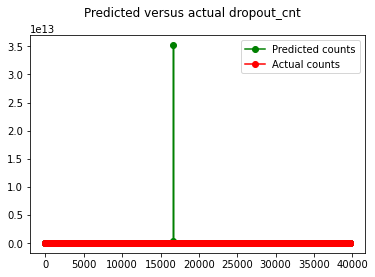

In [85]:
#plot the predicted counts versus the actual counts for the test data
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test1['dropout_cnt']
fig = plt.figure()
fig.suptitle('Predicted versus actual dropout_cnt')
predicted, = plt.plot(X_test1.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test1.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

### Conclusion: 

- The “best” regression model from those we have constructed here, first multiple regression model works best here with 66% accuracy which we got after 5 fold cross validation.
- We will apply that to the evaluation data set and assess how well it performs on that previously unseen data.

In [86]:
model = LinearRegression() #parameter for cross validation model

# fit the model using 5-fold cross validation 

scoresfinal = cross_val_score(model, X_test, y_test, cv=5)

# printing the R^2 metrics derived from the K-fold cross validation of this linear regression model
print (scoresfinal)

[0.66027659 0.68243378 0.68609429 0.65907689 0.67384137]


In [87]:
# calculating the average R^2 across all 5 folds
np.mean(scoresfinal)

0.6723445840062737

 - We can see that evaluation dataset also has similar result of arounf 67% accuracy

References:
1. Prof. Topor's Notebook
2. https://www.youtube.com/watch?v=PzXb7dpgPFk
3. https://gist.github.com/farid-mammadaliyev/775588d371316b25de3b62186b5898ec
4. https://gist.github.com/sachinsdate/7c4bb6b82009a130466c48e0957ffb52
5. https://www.pymc.io/projects/docs/en/v3/pymc-examples/examples/generalized_linear_models/GLM-negative-binomial-regression.html
6. https://anton-granik.medium.com/fitting-and-visualizing-a-negative-binomial-distribution-in-python-3cc27fbc7ecf